Installation des dépendances

In [70]:
import matplotlib.pyplot as plt # afficher des graphiques pour voir l'evolution de notre apprentissage 
import tensorflow as tf # tensorflow
import numpy as np # manipuler des vecteurs et des matrices 
import pandas as pd # gerer beaucoup de données
import sys # autres imports

from sklearn.preprocessing import StandardScaler # standardisateur de données

In [71]:
assert hasattr(tf, "function") # vérifer que notre vertion est bien tensrflow 2.0

In [72]:
from tensorflow import keras #keras est .....

fashion_mnist = keras.datasets.fashion_mnist #c'est une base de données avec des images des vetements 28X28 avec differents couleurs de 0 à 255
(images, targets), (_,_) = fashion_mnist.load_data() #on recupere les images et les targets de la BDD


images = images[:10000]; targets = targets [:10000]#on utilise que 10 000 images et targets de la base de données

print (images.shape); print (targets.shape)#a chaque fois qu'on a une base de données, il faut la print pour voir ce qu'elle a

#print(images[1]) #Afficher une image
print(images.mean()); print(images.std())# afficher la moyenne et afficher l ecart type 

images = images.reshape(-1, 784); images = images.astype(float)# objectif diminuer la moyenne et l ecart type pour qu'elle soit proche de 0

scaler = StandardScaler() ; images = scaler.fit_transform(images)# standardisation des données

print("\n", images.mean()) ; print(images.std())# afficher la moyenne et  l ecart type apres standardisation

#print(images[0]) #afficher la premiere image

(10000, 28, 28)
(10000,)
73.00877385204082
90.2745808471392

 -1.0476880134421886e-18
1.0000000000000007


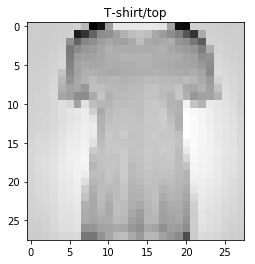

In [73]:
#Creation des classes associees a chaque target 

targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneacker", "Bag", "Ankle boot"]

#plot one image 
# si on change le nombre 11 par 10 on est sur une autre image
plt.imshow(images[10].reshape(28,28), cmap="binary")
plt.title(targets_names[targets[10]])

plt.show()

In [74]:
print("frist line of one image", images[11])
print("Associated targets", targets[11])

frist line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

Creation du modele

In [75]:
# ##### FLATTEN THE IMAGE

# on ajoute 2 couche (layer) avant d'avoir le resultat 
# la premiere de 256 neurones. chaque neurone a 784 poids (28X28)
# la deuxieme de 128 neurones. chaque neurone a 256 poids avec la premiere couche

# la sortie est de 10 neurones. chaque neurone a 128 poids avec la deuxieme couche


# on trasforme l'image pour qui est un tableau a double dimentions en un seul vecteur 

#model = tf.keras.models.Sequential() # un cree un modele de type sequence pour pouvoir faire des modifications sur l'image 


#model.add(tf.keras.layers.Flatten(input_shape= [28, 28])) # on applatie l'image 

#print("Shape of the image", images[0:1].shape) # on affiche une image de 28X28

#model_output = model.predict(images[0:1])

#print("Shape of the image after the flatters", model_output.shape) #afficher l'image apres l'avoir applatie. la resution est 1 par 784 donc nous n'avons pas perdu de donnees 


In [77]:
#### ADD THE LAYERS

model = keras.models.Sequential()# un cree un modele de type sequence pour pouvoir faire des modifications sur l'image 


# add the layers 
model.add(tf.keras.layers.Dense(256, activation="relu"))
# on definit un calque a un layer de 256 neurones
model.add(tf.keras.layers.Dense(128, activation="relu"))
# on definit un calque a un layer de 128 neurones
model.add(tf.keras.layers.Dense(10, activation="softmax"))
# on definit un calque de 10 neurones a la sortie 

model_output = model.predict(images[0:1]) # on fait une prediction sur ma premiere image 

print(model_output, targets[0:1])# on affiche la prediction 
# le 1 est l'adition des valeurs de sortie soient egale a 1. c'est des probabilitées

#https://stackoverflow.com/questions/54677761/deprecation-warning-how-to-remove-tf-keras-warning-calling-variancescaling-i




# LE MODELE S INITIALISE A CHAQUE FOIS DONC DES PROBABILITE DIFERENTES



[[0.07904033 0.3363915  0.04828089 0.03421159 0.08396205 0.23059693
  0.01802342 0.02178966 0.04328477 0.10441892]] [9]


In [79]:
### resume du modele qui vient d'etre cree
model.summary()
## "Trainable param" est le nombre de parametres qui peuvent etre modifies par le tensorflow automatiquement dans le but de reduire l'erreur.


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             multiple                  200960    
_________________________________________________________________
dense_22 (Dense)             multiple                  32896     
_________________________________________________________________
dense_23 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [80]:
### Compile the model 

# definire une descente de gradient pour optimiser le code 

model.compile(
    loss="sparse_categorical_crossentropy", # le loss est le resultat de l'erreur actuelle 
    optimizer="sgd",
    metrics=["accuracy"] #c est un pourcentage
) 



La fonction d'erreur

In [98]:
# prends 5 images et les 5 labels des 5 images 

images_test = images[:5]
labels_test = targets[:5] 

# afficher 5 images de 784 valeurs 
print(images_test.shape)

# afficher les labels. nous avons donc 3 labels (9,0 et 3)
print(labels_test)

# on fait une prediction sur les 5 images qu on lui a donné 
outputs_test = model.predict(images_test)
# afficher la prediction des 5 images. chaque prediction a 10 valeurs
print(outputs_test.shape)

# afficher les valeurs des 5 images. le total est egal a 1. 
print("\nOutputs", outputs_test)

filtered_crossentropy = outputs_test[np.arange(5), labels_test]
print("\nOutputs filtered ", filtered_crossentropy) # la prediction selectionne les probabilitées qui sont des notre classe donc 9,0,0,3,0

log_filterred = np.log(filtered_crossentropy)# minimiser l'erreur il faut prendre le log des probailitées filtrées

print("\nlog filtered output", log_filterred) #afficher les log des probabilitées filtrées

print("\nMoyenne" , log_filterred.mean()) #afficher la moyenne des log des probabilitées filtrées 

print("\ninverse de la Moyenne" , -log_filterred.mean()) #afficher l'inverse de la moyenne des log des probabilitées filtrées pour maximiser les resultats des classes qui nous interesse









(5, 784)
[9 0 0 3 0]
(5, 10)

Outputs [[3.7413749e-05 1.5944098e-04 5.4571312e-05 2.6935266e-05 1.7500296e-04
  7.7057877e-03 2.3744822e-05 2.5209347e-02 5.7076695e-03 9.6090001e-01]
 [9.9126363e-01 1.2729586e-05 6.7179953e-04 3.7175379e-04 1.3190622e-06
  1.0766237e-05 7.6536480e-03 4.7886846e-07 3.7741002e-06 1.0160096e-05]
 [1.7291474e-01 8.1491411e-02 1.6792880e-02 5.6086922e-01 6.1840404e-02
  1.7811224e-03 9.8296985e-02 9.7494520e-04 4.3336293e-03 7.0457050e-04]
 [5.0251842e-01 1.4556818e-02 8.6693885e-03 4.1075715e-01 1.8186988e-03
  2.5712320e-04 6.0698938e-02 1.7859286e-04 3.2277181e-04 2.2210031e-04]
 [7.1434826e-02 2.4115354e-02 1.0359315e-03 8.8985145e-01 2.9904845e-03
  1.5931814e-04 8.3103208e-03 4.3270973e-04 1.1937880e-03 4.7586157e-04]]

Outputs filtered  [0.9609     0.9912636  0.17291474 0.41075715 0.07143483]

log filtered output [-0.03988492 -0.00877476 -1.7549566  -0.8897531  -2.63897   ]

Moyenne -1.0664679

inverse de la Moyenne 1.0664679


Former le modèle

In [101]:

#lancement de l'apprentissage
history = model.fit(images, targets, epochs=10) 
#"epochs=10" c'est un passage de 10 fois sur le dataset en reduisant l'erreur

# le "acc" est le nombre de resultats corects qui ont ete realises


Epoch 1/10
10000/10000 [==============================] - 1s 136us/sample - loss: 0.1181 - acc: 0.9665
Epoch 2/10
10000/10000 [==============================] - 1s 103us/sample - loss: 0.1103 - acc: 0.9711
Epoch 3/10
10000/10000 [==============================] - 1s 106us/sample - loss: 0.1035 - acc: 0.9717
Epoch 4/10
10000/10000 [==============================] - 1s 111us/sample - loss: 0.0986 - acc: 0.9746
Epoch 5/10
10000/10000 [==============================] - 1s 110us/sample - loss: 0.0924 - acc: 0.9761
Epoch 6/10
10000/10000 [==============================] - 1s 108us/sample - loss: 0.0887 - acc: 0.9778
Epoch 7/10
10000/10000 [==============================] - 1s 110us/sample - loss: 0.0812 - acc: 0.9815
Epoch 8/10
10000/10000 [==============================] - 1s 112us/sample - loss: 0.0775 - acc: 0.9823
Epoch 9/10
10000/10000 [==============================] - 1s 119us/sample - loss: 0.0738 - acc: 0.9843
Epoch 10/10
10000/10000 [==============================] - 1s 112us/sampl

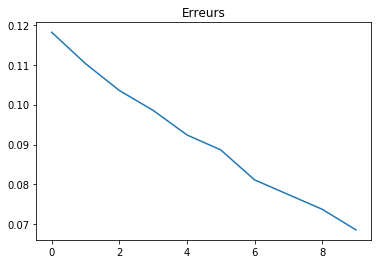

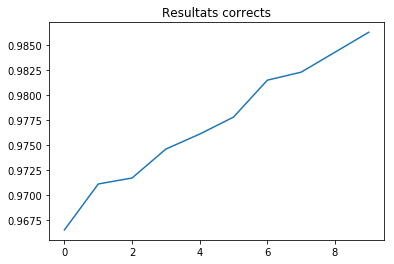

In [102]:
loss_curve =history.history["loss"]
acc_curve = history.history["acc"]

plt.plot(loss_curve)
plt.title("Erreurs")
plt.show()

plt.plot(acc_curve)
plt.title("Resultats corrects")
plt.show()